# Taks 1. Bifurcation map and Task 4. Specgram
##### (parallel them all!)

Nikolay Zherdev

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Bifurcation Map

In [0]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

## Write a function

In [0]:
x0 = random.uniform(0, 1)

def calc_next(r, x_prev):
    return r * x_prev * (1 - x_prev)

def plot_bif(r, steps=200, rm_first=100):
    """
    r - const
    
    """

    vals = [x0]
    x_prev = x0
    for step in range(steps):
        x_next = calc_next(r, x_prev)
        vals.append(x_next)
        x_prev = x_next
    print(len(vals[rm_first+1:]))
    plt.plot(vals[rm_first+1:])

def calc_bif(r, steps, rm_first):
    """
    r - const
    
    """

    vals = [x0]
    x_prev = x0
    for step in range(steps):
        x_next = calc_next(r, x_prev)
        vals.append(x_next)
        x_prev = x_next
    return vals[rm_first+1:]

100


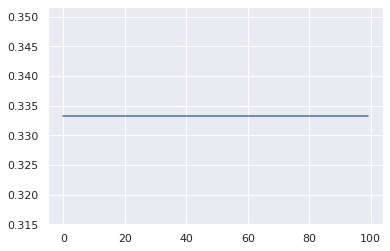

In [4]:
plot_bif(1.5, steps=200, rm_first=100)

100


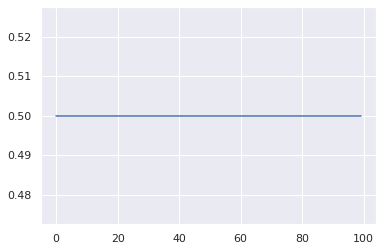

In [5]:
plot_bif(2, steps=200, rm_first=100)

100


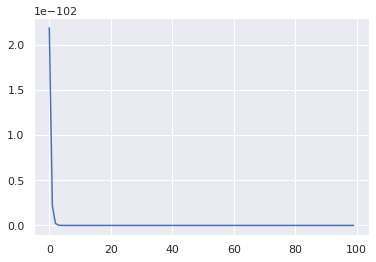

In [6]:
plot_bif(0.1, steps=200, rm_first=100)

100


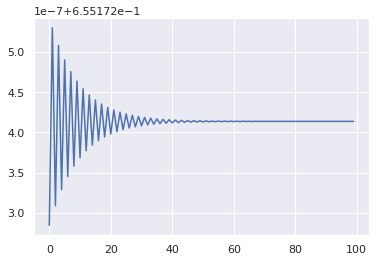

In [7]:
plot_bif(2.9, steps=200, rm_first=100)

100


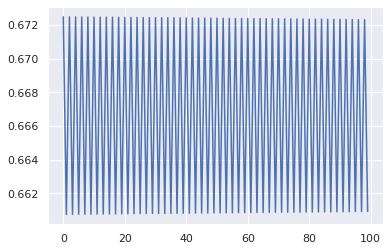

In [8]:
plot_bif(3, steps=200, rm_first=100)

100


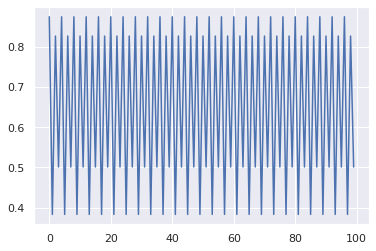

In [9]:
plot_bif(3.5, steps=200, rm_first=100)

100


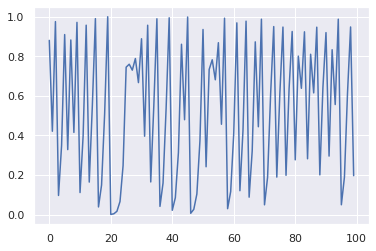

In [10]:
plot_bif(4, steps=200, rm_first=100)

100


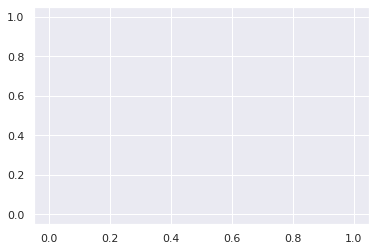

In [11]:
plot_bif(5, steps=200, rm_first=100)

## Bifurcation map


T1.1 	Implement the map, plot the evolution of x 	1

T1.2 	Create a linspace of r’s, for every r save the last “m” values of x after the first “n” values (can be m=200, x=200), play around with values 	1 	

T1.3 	Get the bifurcation map 	1 
	

In [12]:
def plot_bif_map(X, Y):
    plt.figure(figsize=(16,8))
    plt.scatter(X, Y, s=0.05, c='black')

def calc_world(start, end, resolution, steps, rm_first, plot=True):

    r = np.linspace(start, end, resolution)
    X = []
    Y = []

    for i in r:
      X.append([i]*(steps-rm_first))
      vals = calc_bif(i, steps, rm_first)
      for k in vals:
          Y.append(k)

    X = np.array(X)
    Y = np.array(Y)
    if plot:
        plot_bif_map(X.ravel(), Y)
    else:
        X.ravel()

%timeit calc_world(start=0, end=5, resolution=10000, steps=200, rm_first=100, plot=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


1 loop, best of 3: 1.51 s per loop


# Profiling

In [0]:
import cProfile

In [14]:
!pip install line_profiler

     |████████████████████████████████| 92kB 2.9MB/s 
  Created wheel for line-profiler: filename=line_profiler-2.1.2-cp36-cp36m-linux_x86_64.whl size=180889 sha256=c3a48f5f663c991b9af981e9c7c200431a8b95d3b8b7e3e873a073cbf524e7c5
  Stored in directory: /root/.cache/pip/wheels/05/7d/9b/aafbe8d78dc2b2c644d2efd2f060ab3258143860142575193a
Successfully built line-profiler


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


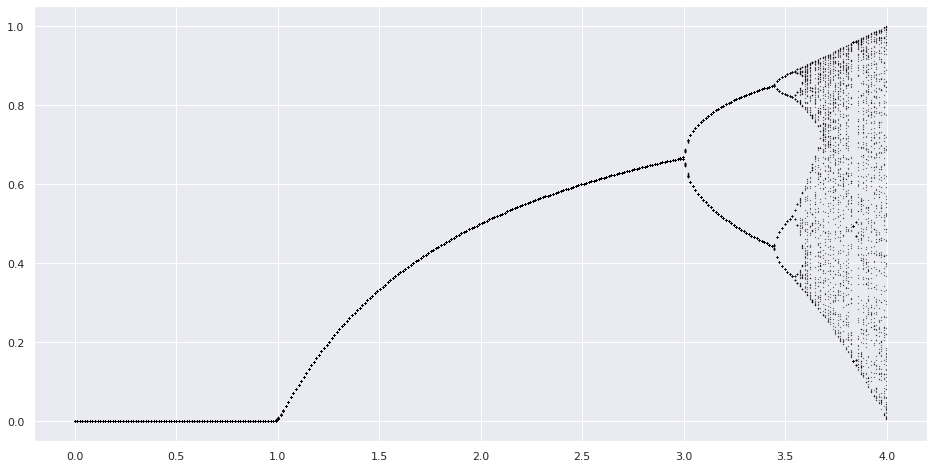

In [15]:
%load_ext line_profiler
%lprun -f calc_world calc_world(start=0, end=5, resolution=400, steps=200, rm_first=100)

In [0]:
m_given = 100

# cProfile.run('repeat_loops(m = ' + str(m_given) + ')' )
# cProfile.run('calc_world(start=0, end=5, resolution=400, steps=200, rm_first=100)')

In [17]:
!pip install memory_profiler

     |████████████████████████████████| 40kB 2.2MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.55.0-cp36-none-any.whl size=27174 sha256=77bba26d377f17a921b29c0212bc27d09acb271898388c22cf5154bfe30e56ac
  Stored in directory: /root/.cache/pip/wheels/f0/ff/63/fdbff3f1e1b76ad4eae491dd5b190902906b093e93eb86dd5a
Successfully built memory-profiler


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


peak memory: 245.42 MiB, increment: 0.02 MiB


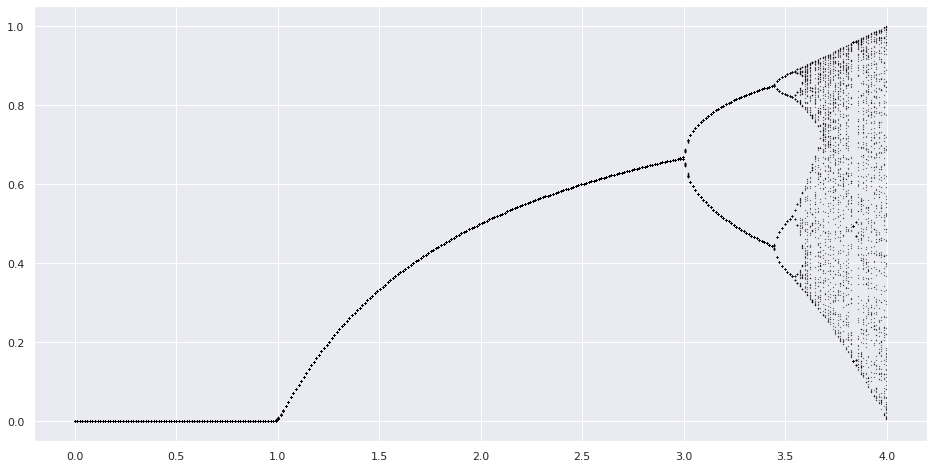

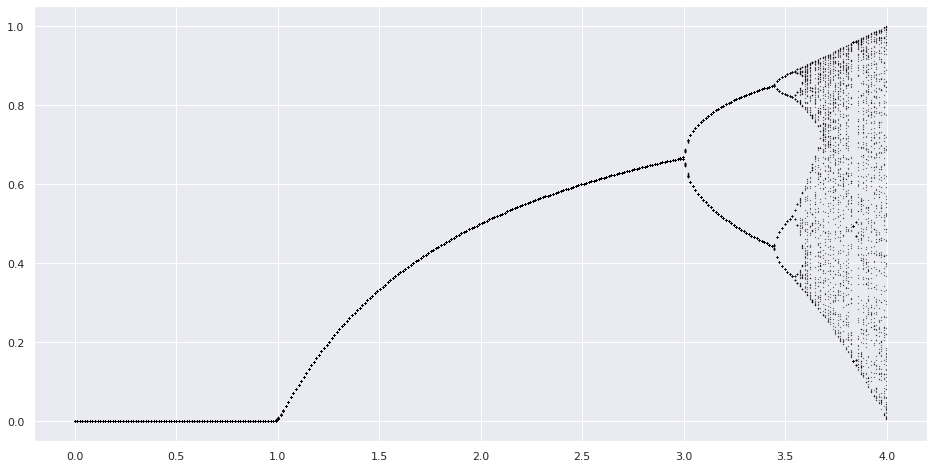

In [18]:
%load_ext memory_profiler
%memit calc_world(start=0, end=5, resolution=400, steps=200, rm_first=100)

# MPI BifMap

In [20]:
%%file bmmpi.py

import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

t1 = MPI.Wtime()

x0 = random.uniform(0, 1)

def calc_next(r, x_prev):
    return r * x_prev * (1 - x_prev)

def calc_bif(r, iterations, rm_first):
    """
    r - const
    
    """
    vals = [x0]
    x_prev = x0
    for iteration in range(iterations):
        x_next = calc_next(r, x_prev)
        vals.append(x_next)
        x_prev = x_next
    return vals[rm_first+1:]

def calc_world(start, end, grid_size, iterations, rm_first):

    r = np.linspace(start, end, grid_size)
    X = []
    Y = []

    for i in r:
      X.append([i]*(iterations-rm_first))
      vals = calc_bif(i, iterations, rm_first)
      for k in vals:
          Y.append(k)

    X = np.array(X)
    Y = np.array(Y)
    # print(X.ravel().shape, Y.shape)
    # print(X.flatten().shape, Y.shape)
    return X.ravel(), Y


def plot_bif_map(X, Y):
    plt.figure(figsize=(16,8))
    plt.scatter(X, Y, s=0.05, c='red')
    plt.savefig("mifmap.png")
    # plt.show()


r_start = 0.0
r_end = 4.0
grid_size = 10000
iterations=200
rm_first=100

vals_of_r = np.linspace(r_start, r_end, grid_size)

my_grid_size = int(grid_size / size)
my_r_start_ind = int(rank * my_grid_size)
my_r_end_ind = int((rank+1) * my_grid_size-1)

my_r_start = vals_of_r[my_r_start_ind]
my_r_end = vals_of_r[my_r_end_ind]

# print("start, end, steps, rank: ", my_r_start, my_r_end, my_grid_size, rank)

data_gathered = comm.gather(calc_world(my_r_start, 
                                       my_r_end, 
                                       my_grid_size, 
                                       iterations, 
                                       rm_first), 
                            root=0)

if rank==0:
    data_gathered = np.array(data_gathered)

    # print(data_gathered[0])
    # print(data_gathered[1])
    # print(data_gathered.shape)
    # print(data_gathered[0].shape)
    # print(data_gathered[0])

    array_size = data_gathered.shape[2] * size
    x = data_gathered[:, 0].reshape(array_size)
    y = data_gathered[:, 1].reshape(array_size)


TIME = comm.gather((MPI.Wtime() - t1), root=0)
if not rank:
    print(np.sum(TIME)/size)

    # plot_bif_map(x, y)

Overwriting bmmpi.py


In [0]:
# t = !mpiexec --allow-run-as-root -n 4 python -m mpi4py bmmpi.py
# float(t[0])

In [25]:
# !lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [0]:
# %timeit !mpiexec --allow-run-as-root -n 5 python -m mpi4py bmmpi.py

In [27]:
# from IPython.display import Image
# Image("mifmap.png", width=800, height=400)

### Plot speedup versus number of processors graph.

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


1 loop, best of 3: 1.52 s per loop
1.4903874660003567


No handles with labels found to put in legend.


0.7835753644994838


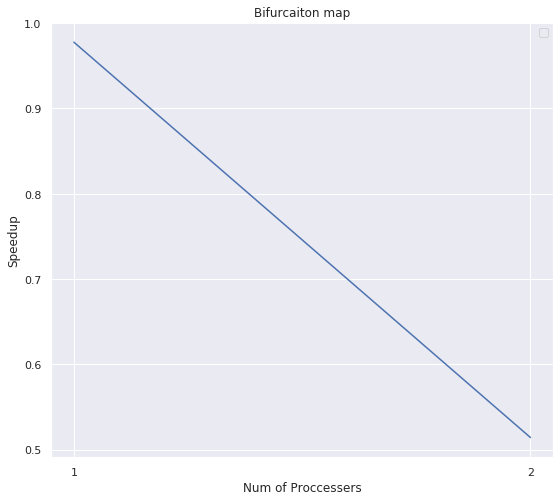

In [30]:

t_seq = %timeit -o calc_world(start=0, end=5, resolution=10000, steps=200, rm_first=100, plot=False)

time = np.zeros(2, dtype="float64")
speedup = np.zeros(2, dtype="float64")

processors = [1, 2]

for team_size in processors:
    t = !mpiexec --allow-run-as-root -n {team_size} python -m mpi4py bmmpi.py
    print(t[0])
    time[team_size-1] = float(t[0])
    speedup[team_size-1] = float(t[0]) / t_seq.best

plt.figure(figsize=(9,8))
plt.plot(processors, speedup)
plt.ylabel('Speedup')
plt.xlabel('Num of Proccessers')
plt.xticks([1,2])
plt.title('Bifurcaiton map')
# plt.legend()
plt.show()

# Archive

In [0]:
# numpy version
# def calc_world(r, iterations=10, rm_first=0):

#     size = len(r) * (iterations-rm_first)
#     X = np.empty(size, np.float64)
#     Y = np.empty(size, np.float64)

#     for i, val in enumerate(r):
#         X[i] = val*(iterations-rm_first)
#         vals = calc_bif(val, iterations, rm_first)
#         for k, val in enumerate(vals):
#             Y[k] = val

#     return X, Y

In [0]:
# %%file test.py
# from mpi4py import MPI
# import numpy as np

# def dummy(r):
#   return r.sum()

# comm = MPI.COMM_WORLD
# rank = comm.Get_rank()
# size = comm.Get_size()

# # print(rank)

# r_start = 0.0
# r_end = 4.0
# n_steps=8

# ## serial
# # r_serial = np.linspace(r_start, r_end, n_steps)
# # print(r_serial)
# # print(" ")

# ## parallel 
# my_n_steps = n_steps / size
# my_r_start = rank * my_n_steps
# my_r_end = (rank+1) * my_n_steps-1

# print(my_r_start, my_r_end, rank)

# r_parallel = np.linspace(my_r_start, my_r_end, my_n_steps)
# print(r_parallel, rank)
# data_gathered = comm.gather(dummy(r_parallel), root=0)

# print(data_gathered, rank)

In [0]:
%%file gather.py
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

sendbuf = np.zeros(10, dtype='i') + rank
print(sendbuf)
recvbuf = None
if rank == 0:
    recvbuf = np.empty([size, 10], dtype='i')
comm.Gather(sendbuf, recvbuf, root=0)
print(recvbuf)

In [0]:
# !mpiexec --allow-run-as-root -n 4 python -m mpi4py gather.py

In [0]:
x1 = np.ones(5)
y1 = np.zeros(5)
x2 = np.ones(5)*2
y2 = np.zeros(5)

total = np.stack((np.stack((x1, y1)), np.stack((x2, y2))))
print(total.shape)

print(total)
print(" ")

x = total[:, 0].reshape(10)
y = total[:, 1].reshape(10)
print(x)
print(y)